In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load data

In [25]:
df = pd.read_csv("prepared_churn_data.csv")

df.head(5)

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Scaled_TotalCharges_to_MonthlyCharges_ratio
0,1,1,0,Month-to-month,Electronic check,-1.160323,0.001275,0,-0.001099
1,2,34,1,One year,Mailed check,-0.259629,0.215867,0,-0.831443
2,3,2,1,Month-to-month,Mailed check,-0.362660,0.010310,1,-0.028430
3,4,45,0,One year,Bank transfer (automatic),-0.746535,0.210241,0,-0.281622
4,5,2,1,Month-to-month,Electronic check,0.197365,0.015330,1,0.077673


## Prepping data for Modelling

## Generating  dummies and converting to numeric

In [26]:
pm_dummies = pd.get_dummies(df['PaymentMethod'], prefix='PaymentMethod')
contract_dummies = pd.get_dummies(df['Contract'], prefix='Contract')

df = pd.concat([df, pm_dummies, contract_dummies], axis=1)

df.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Scaled_TotalCharges_to_MonthlyCharges_ratio,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,1,0,Month-to-month,Electronic check,-1.160323,0.001275,0,-0.001099,False,False,True,False,True,False,False
1,2,34,1,One year,Mailed check,-0.259629,0.215867,0,-0.831443,False,False,False,True,False,True,False
2,3,2,1,Month-to-month,Mailed check,-0.362660,0.010310,1,-0.028430,False,False,False,True,True,False,False
3,4,45,0,One year,Bank transfer (automatic),-0.746535,0.210241,0,-0.281622,True,False,False,False,False,True,False
4,5,2,1,Month-to-month,Electronic check,0.197365,0.015330,1,0.077673,False,False,True,False,True,False,False


In [27]:
dummies = ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PaymentMethod_Credit card (automatic)']

for column in dummies:
    df[column] = pd.factorize(df[column])[0]

df.sample(5)

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Scaled_TotalCharges_to_MonthlyCharges_ratio,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
2163,2164,29,1,Month-to-month,Electronic check,1.121324,0.344490,1,0.307217,0,0,0,0,0,0,0
4634,4635,2,1,Month-to-month,Bank transfer (automatic),-1.529242,0.003964,0,-0.002592,1,0,1,0,0,0,0
6488,6489,1,1,Month-to-month,Electronic check,0.157482,0.005850,1,0.037150,0,0,0,0,0,0,0
3202,3203,1,1,Month-to-month,Electronic check,-0.316130,0.004206,0,-0.013305,0,0,0,0,0,0,0
2895,2896,37,1,One year,Bank transfer (automatic),-1.492682,0.080625,0,-0.054014,1,0,1,0,1,1,0


## Drop unnecessary columns

In [28]:
df = df.drop(['PaymentMethod', 'Contract', 'customerID'], axis=1)
df.tail()

,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,Scaled_TotalCharges_to_MonthlyCharges_ratio,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
7038,24,1,0.665992,0.227521,0,0.341628,0,0,1,1,1,1,0
7039,72,1,1.277533,0.847461,0,0.663358,0,1,1,0,1,1,0
7040,11,0,-1.168632,0.037809,0,-0.032353,0,0,0,0,0,0,0
7041,4,1,0.320338,0.033210,1,0.103672,0,0,1,1,0,0,0
7042,66,1,1.358961,0.787641,0,0.579591,1,0,1,0,1,0,1


In [29]:
df.isna().sum()

tenure                                         0
PhoneService                                   0
MonthlyCharges                                 0
TotalCharges                                   0
Churn                                          0
Scaled_TotalCharges_to_MonthlyCharges_ratio    0
PaymentMethod_Bank transfer (automatic)        0
PaymentMethod_Credit card (automatic)          0
PaymentMethod_Electronic check                 0
PaymentMethod_Mailed check                     0
Contract_Month-to-month                        0
Contract_One year                              0
Contract_Two year                              0
dtype: int64

## Data Modelling

## features and targets

In [30]:
features = df.drop('Churn', axis=1)
targets = df['Churn']

In [31]:
targets.tail()

7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, dtype: int64

In [32]:
features.head()

,tenure,PhoneService,MonthlyCharges,TotalCharges,Scaled_TotalCharges_to_MonthlyCharges_ratio,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,-1.160323,0.001275,-0.001099,0,0,0,0,0,0,0
1,34,1,-0.259629,0.215867,-0.831443,0,0,1,1,1,1,0
2,2,1,-0.362660,0.010310,-0.028430,0,0,1,1,0,0,0
3,45,0,-0.746535,0.210241,-0.281622,1,0,1,0,1,1,0
4,2,1,0.197365,0.015330,0.077673,0,0,0,0,0,0,0


In [33]:
X = features
y = targets

## training and testing sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

X_train contains the features of the training dataset.

X_test contains the features of the testing dataset.

y_train contains the target variable values corresponding to the training dataset - churn

y_test contains the target variable values corresponding to the testing dataset - churn

In [35]:
X_train.shape

(5634, 12)

There are 5634 samples in the training dataset.
    
There are 12 features in the training dataset.

## Fit model into training data

In [36]:
lr_model = LogisticRegression(max_iter=3000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=3000)

We'll use a maximum of 3000 iterations

In [37]:
print(lr_model.score(X_train, y_train))
print(lr_model.score(X_test, y_test))

0.7951721689740859
0.78708303761533


The accuracy of the logistic regression model on the training data is approximately `79.52%` meaning the the model correctly predicts the churn status of about 79.52% of the customers in the training dataset.

The accuracy of the logistic regression model on the test data is approximately `78.71%`.

## Predictions on the dataset

In [38]:
y_pred = lr_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

## Evaluating the model

In [39]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n',classification_report(y_test, y_pred))

Accuracy: 0.79
Confusion Matrix:
[[918 117]
 [183 191]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



## Confusion Matrix

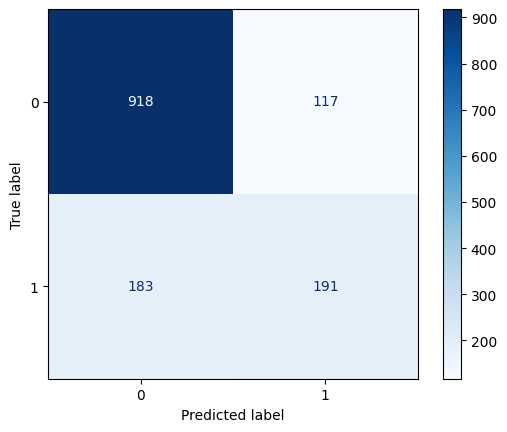

In [40]:
cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**True negatives (TN)**

The model correctly predicted 918 instances where the true label is 0 (no churn). This shows the number of customers who were correctly identified as not churning. These are satisfied customers who were retained by the company.

**False negatives (FN)**

The model incorrectly predicted 0 (no churn) when the true label is 1 (churn) in 183 instances. This signifies the number of customers who were incorrectly identified as not churning, leading to missed opportunities for intervention. These are customers who churned despite the model predicting otherwise.

**True positives (TP)**

The model correctly predicted 191 instances where the true label is 1 (churn). This signifies the number of customers who were correctly identified as churning. These are customers who actually churned, and the model successfully flagged them for attention or intervention.

**False positives (FP)**

The model incorrectly predicted 1 (churn) when the true label is 0 (no churn) in 117 instances. This signifies the number of customers who were incorrectly identified as churning, leading to unnecessary intervention or resources being allocated to customers who were not at risk of churning.

## Comparison with No information Rate

In [41]:
no_info_rate = max(y_train.value_counts(normalize=True))
print(f'No Information Rate: {no_info_rate}')

No Information Rate: 0.7346467873624423


## Tuning the model

In [42]:
lr_model.predict_proba(X_test)

array([[0.94217676, 0.05782324],
       [0.35060258, 0.64939742],
       [0.89966283, 0.10033717],
       ...,
       [0.81978587, 0.18021413],
       [0.99654161, 0.00345839],
       [0.98824542, 0.01175458]])

In [43]:
lr_model.predict(X_test)[:15]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [44]:
(lr_model.predict_proba(X_test)[:10, 1] > 0.5).astype('int')

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

A boolean array indicating whether the predicted probability of class 1 (positive class) for each sample in the first 10 rows of the test set is greater than 0.5. The .astype('int') method then converts these boolean values to integers, where True becomes 1 and False becomes 0.

A value of 1 indicates that the predicted probability of belonging to class 1 is greater than 0.5, while a value of 0 indicates that it is not.


## Using lowest threshold

In [45]:
lt_predictions = (lr_model.predict_proba(X_test)[:10, 1] > 0.15).astype('int')
lt_predictions

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

## Accuracy and TP rate

In [53]:
lt_predictions= (lr_model.predict_proba(X_test)[:, 1] > 0.15).astype('int')

print(accuracy_score(y_test, lt_predictions))

0.6508161816891412


Out of all the samples in the test set, approximately 65.08% of them were correctly classified by the model.

The model's predictions matched the true labels for approximately 65.08% of the samples in the test set.

In [54]:
tn, fp, fn, tp  = confusion_matrix(y_test, lt_predictions).flatten()
print(tp / (tp + fn))

0.9197860962566845


The model correctly identified approximately `91.98%` of the actual churn cases from the total number of churn cases in the dataset. Out of all the customers who actually churned, the model correctly identified `91.98%` of them as churned.

A high True Positive Rate (TPR) signifies that the model is effective in identifying positive cases (churned customers), which is vital for making informed decisions and taking appropriate actions to address churn and retain valuable customers.

## Getting coefficients and plotting a bar chart

In [55]:
lr_model.coef_

array([[-4.67493626e-02, -8.11543864e-01,  8.28394593e-01,
         1.23529374e+00, -1.20633374e-03, -1.18014269e-01,
        -1.51370480e-01, -3.99343541e-01, -1.29958792e-01,
        -9.56401085e-01, -3.78896606e-02, -9.18511424e-01]])

<Axes: >

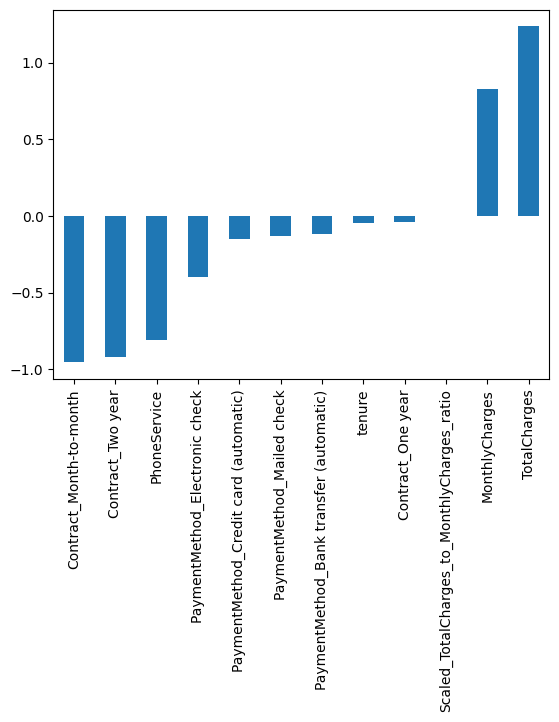

In [56]:
coef_df = pd.DataFrame(data=lr_model.coef_, columns=features.columns)

coef_df.T.sort_values(by=0).plot.bar(legend=False)

From the plot, those with positive coefficients - MonthlyCharges and TotalCharges - have a positive impact on the likelihood of churn, while features with negative coefficients (downward bars) have a negative impact.

The plot provides insights into which features are most influential in predicting churn.

The coefficients and the plot help in understanding the relative importance of different features in predicting churn, guiding decision-making processes aimed at reducing churn rates and improving customer retention strategies.

## Using Other ML Models

In [57]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [58]:
rf_model = RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)
gb_model = GradientBoostingClassifier(max_depth=4, random_state=42)

In [60]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [61]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, random_state=42)

In [62]:
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

0.8035143769968051
0.794889992902768


In [63]:
print(gb_model.score(X_train, y_train))
print(gb_model.score(X_test, y_test))

0.8361732339368122
0.7835344215755855


Two classifiers, Random Forest and Gradient Boosting, are introduced and their performance evaluated on the training and test sets.

**Random Forest Classifier**

Trained with a maximum depth of 5 and using all available CPU cores for parallel processing. Achieved an accuracy score of approximately 80.35% on the training set and 79.45% on the test set.

**Gradient Boosting Classifier**

Trained with a maximum depth of 4. Achieved an accuracy score of approximately 83.62% on the training set and 78.35% on the test set.

**Interpretation**

Both models demonstrate decent performance, with the Gradient Boosting Classifier slightly outperforming the Random Forest Classifier on the training set.

Random Forest Classifier performs slightly better on the test set compared to the Gradient Boosting Classifier, suggesting that it may generalize slightly better to unseen data.

The difference in performance between the training and test sets for both models is relatively small, indicating that there is no significant overfitting.


## Predictions on the test set

In [64]:
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

## Plot Confusion matrix

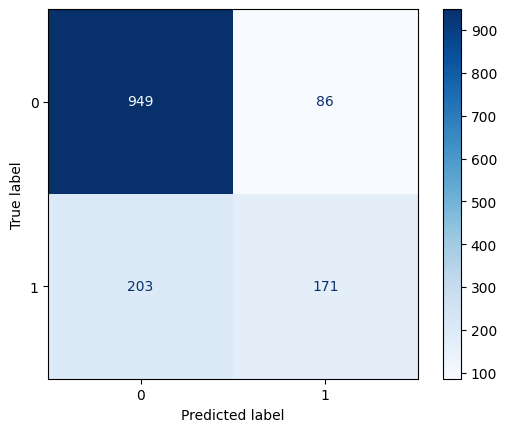

In [65]:
cm = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

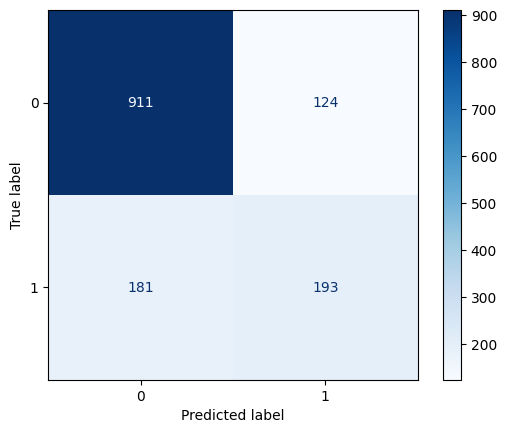

In [66]:
cm = confusion_matrix(y_test, y_pred_gb, labels=gb_model.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Optimizing Hyperparameters

In [68]:
from sklearn.model_selection import GridSearchCV

# classifiers and hyperparameters
classifiers = {
    'Random Forest': (RandomForestClassifier(), {'max_depth': [3, 5, 10, None], 'n_estimators': [10, 100, 200], 'max_features': [1, 3, 5, 7], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4]}),
    'Logistic Regression': (LogisticRegression(), {'max_iter': [2000, 4000, 6000]}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'max_depth': [3, 5, 10, None], 'n_estimators': [10, 100, 200], 'max_features': [1, 3, 5, 7], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4]})
}

# grid search for each classifier
for name, (classifier, param_grid) in classifiers.items():
    grid = GridSearchCV(classifier, param_grid=param_grid, cv=3, scoring='accuracy')
    model_grid = grid.fit(X_train, y_train)
    print(f'Best hyperparameters for {name} are: {model_grid.best_params_}')
    print(f'Best score for {name} is: {model_grid.best_score_}')

Best hyperparameters for Random Forest are: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10}
Best score for Random Forest is: 0.7976570820021299
Best hyperparameters for Logistic Regression are: {'max_iter': 2000}
Best score for Logistic Regression is: 0.7946396876109336


KeyboardInterrupt: 

## NB - had to do interrupt the kernel because the GB hyperparameters were taking longer to run

These results provide insights into the optimal hyperparameters and corresponding performance scores for the different machine learning models: Random Forest and Logistic Regression.

#### Random Forest

    Best Hyperparameters
        max_depth: 5
        max_features: 3
        min_samples_leaf: 1
        min_samples_split: 4
        n_estimators: 10
    Best Score: 0.798

These hyperparameters indicate the configuration that yielded the highest performance for the Random Forest model, with an associated score of approximately 0.798.

#### Logistic Regression

    Best Hyperparameters
        max_iter: 2000
    Best Score: 0.795

For Logistic Regression, the optimal hyperparameter setting involves setting max_iter to 2000, resulting in a performance score of around 0.795.

In [69]:
model_grid.best_estimator_

LogisticRegression(max_iter=2000)

In [70]:
print(classification_report(y_test, model_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



## ROC Curve

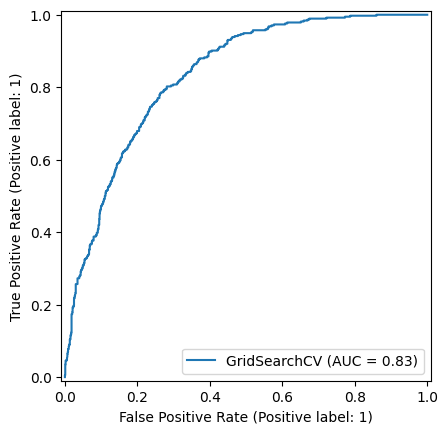

In [71]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model_grid, X_test, y_test)
plt.show()

## Prediction probabilities

<Axes: xlabel='predicted_probability', ylabel='Density'>

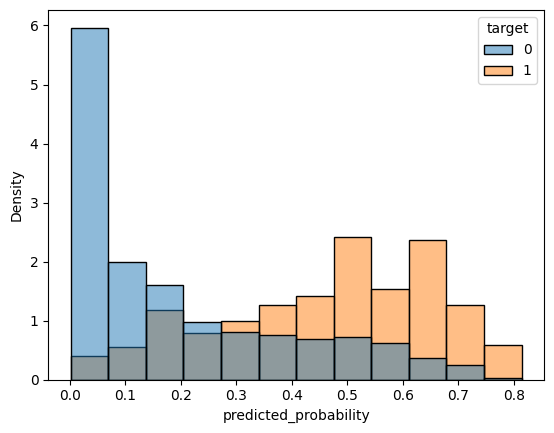

In [72]:
probabilities = lr_model.predict_proba(X_test)[:, 1]

prob_df = pd.DataFrame(data={'predicted_probability': probabilities, 'target': y_test})

sns.histplot(data=prob_df, x='predicted_probability', hue='target', stat='density', common_norm=False)


In [73]:
index = prob_df[(prob_df['target'] == 1) & (prob_df['predicted_probability'] < 0.5)].index
prob_df.loc[index]

X_test.loc[index]

,tenure,PhoneService,MonthlyCharges,TotalCharges,Scaled_TotalCharges_to_MonthlyCharges_ratio,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
1639,17,1,-0.655137,0.086753,-0.132419,0,0,0,0,0,0,0
950,2,1,-0.658460,0.007656,-0.011628,0,0,1,1,0,0,0
2488,31,1,-0.316130,0.195805,-0.619383,0,0,0,0,0,0,0
523,23,1,0.360221,0.200762,0.557328,1,0,1,0,0,0,0
6304,9,1,0.428355,0.080239,0.187319,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
481,48,0,-0.646828,0.245350,-0.379312,1,0,1,0,0,0,0
610,9,0,-1.156999,0.026558,-0.022954,0,0,0,0,0,0,0
5536,9,0,-0.999129,0.031999,-0.032027,0,1,1,0,0,0,0
1477,61,1,1.370594,0.753393,0.549683,0,0,0,0,1,1,0


## Summary

This analysis delves into a churn dataset, beginning with data loading and preprocessing steps such as converting categorical features into numeric representations and splitting the data into training and testing sets. 

A Logistic Regression model is trained and evaluated using accuracy scores, confusion matrices, and threshold adjustments for deeper scrutiny. 

Additionally, Random Forest and Gradient Boosting models are trained, with hyperparameter tuning conducted via grid search. The results include the best hyperparameters and scores for each model, along with a classification report for the top-performing model.

# Deployment

## API Integration

Deploying the model as an API facilitates seamless integration with the company's customer management system, enabling real-time predictions based on incoming customer data. This integration automates churn probability predictions, empowering customer service representatives to proactively engage with at-risk customers and implement targeted retention strategies. Marketing efforts benefit from the model's insights by identifying high-churn probability segments for tailored campaigns, fostering customer loyalty and reducing attrition.
 
Moreover, the model guides product development by highlighting features correlated with customer retention, facilitating the creation of more appealing offerings. Ultimately, deploying this churn prediction model enhances customer satisfaction, lowers churn rates, and boosts business profitability.